**Session 2:** we do analysing for Water withdrawal per capita, and water withdrawal in Total.
* First part: Data Preprocessing, Data Preparation, and Data Exploration about Water Withdrawal Per Capita
* Second part: Modeling for Prediction. Linear Regression and Random Forest Regression method conducts for predicting Water Withdrawal per cap
* Third part: Water withdrawal in Total

## Import libraries

In [98]:
# importing required Python libraries
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib                import pyplot as plt

from sklearn.preprocessing     import LabelEncoder
from sklearn.model_selection   import train_test_split
from sklearn.linear_model      import LinearRegression
from sklearn.ensemble          import RandomForestRegressor
from sklearn                   import metrics
                             

## Loading dataset

In [99]:
# Loading data, we use the data that we have preprocessing in the Factor Analysis part. This data is in year 2018
data=pd.read_excel("CFA_data.xlsx")
data.describe(include="all")
data.head()

,Unnamed: 0,population,ppl_den,gdp_per,gdp_agri,gdp_ind,gdp_ser,ws_in,ws_tot,ww_agri,...,ws,wue,wue_agri,wue_ind,wue_ser,wd_tot,wd_rural,wd_urban,country,region
0,0,42228.408,17.730059,4136.289853,2.081500e+10,6.685176e+10,8.017580e+10,266.337296,11.667,6.6710,...,137.920360,14.463198,0.619380,350.377103,22.294463,83.6,81.8,84.3,Algeria,Africa
1,1,98423.598,98.281090,2513.199691,2.803456e+10,8.206749e+10,1.338240e+11,10.160165,57.500,61.3500,...,141.165756,4.584392,0.665586,22.136180,18.132214,99.4,99.0,100.0,Egypt,Africa
2,2,6678.559,3.795628,5312.471944,2.735459e+08,2.001877e+10,1.016851e+10,104.813029,0.700,4.8500,...,817.142857,4.287072,0.018498,58.982461,11.984035,71.2,68.3,72.1,Libya,Africa
3,3,36029.093,80.683222,3258.233846,1.446074e+10,2.759058e+10,6.194435e+10,804.905080,29.000,9.1560,...,50.751212,8.715869,0.432900,126.389217,56.591798,85.4,65.3,98.7,Morocco,Africa
4,4,11565.201,70.687617,3421.777360,3.905261e+09,9.038391e+09,2.443503e+10,362.726078,4.615,2.9326,...,95.998781,10.220137,0.272201,226.554750,32.440686,97.7,93.2,100.0,Tunisia,Africa


In [100]:
data.drop(columns="Unnamed: 0", inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  165 non-null    float64
 1   ppl_den     165 non-null    float64
 2   gdp_per     165 non-null    float64
 3   gdp_agri    165 non-null    float64
 4   gdp_ind     165 non-null    float64
 5   gdp_ser     165 non-null    float64
 6   ws_in       165 non-null    float64
 7   ws_tot      165 non-null    float64
 8   ww_agri     165 non-null    float64
 9   ww_ind      165 non-null    float64
 10  ww_mu       165 non-null    float64
 11  ww_tot      165 non-null    float64
 12  ww_per      165 non-null    float64
 13  ww_fresh    165 non-null    float64
 14  ws          165 non-null    float64
 15  wue         165 non-null    float64
 16  wue_agri    165 non-null    float64
 17  wue_ind     165 non-null    float64
 18  wue_ser     165 non-null    float64
 19  wd_tot      165 non-null    f

## Water Withdrawal Per Capita

**Total water withdrawal per capita**

* Definition: Total annual amount of water withdrawn per capita.

* Calculation Criteria:
[Total water withdrawal per capita] = [Total water withdrawal]*1000000/[Total population]

* Unit
m3/year per inhabitant

In [101]:
data["region"].unique()

array(['Africa ', 'Americas ', 'Asia ', 'Oceania ', 'Europe '],
      dtype=object)

**Data Preparation:**

Fill the missing data using the median of the region that a country belongs to, as countries that are close geologically are often similar in many aspects.

In [102]:
data.groupby('region')[["population","ppl_den",'gdp_per',"ws_tot","wue",'ww_per','wd_tot']].median()

,population,ppl_den,gdp_per,ws_tot,wue,ww_per,wd_tot
region,,,,,,,
Africa,14438.8020,53.037748,1321.381592,37.80,10.990217,74.782769,76.50
Americas,10627.1410,49.593472,6827.188847,164.52,13.074402,500.167869,94.90
Asia,19774.1905,108.206902,4241.408290,64.33,6.134966,586.217771,93.75
Europe,8664.1825,103.230444,24745.567088,64.45,60.245673,337.484267,100.00
Oceania,4743.1310,17.717422,43776.465705,327.00,43.051242,697.308780,100.00


In [103]:
for col in data.columns.values:
    if data[col].isnull().sum() == 0:
        continue
    if col == 'ww_per':
        guess_values = data.groupby('region')['ww_per'].apply(lambda x: x.mode().max())
    else:
        guess_values = data.groupby('region')[col].median()
    for region in data['region'].unique():
        data[col].loc[(data[col].isnull())&(data['region']==region)] = guess_values[region]

**Data Exploration**
Top Countries with highest Water Withdrawal per capita

Observe the bar graph of the top 20 countries with the highest Water withdrawal per capita. **Turkmenistan** is quite ahead, the next 19 countries are close. **Uruguay**, the 20th still has high water use per capital, and far away capita of the world average.

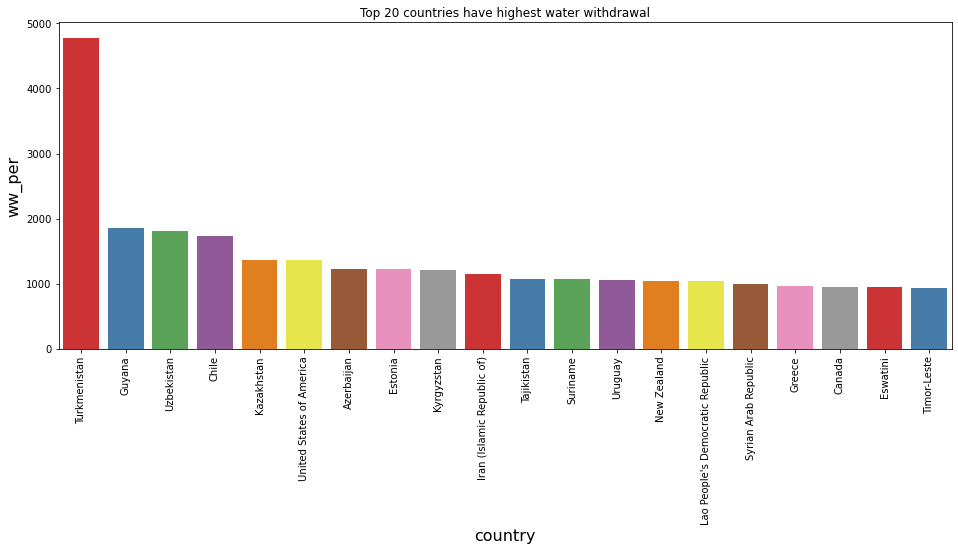

In [119]:

# Top 20 Countries with highest water withdrawal per cap
fig, ax = plt.subplots(figsize=(16,6))
top_ww_countries = data.sort_values('ww_per',ascending=False).head(20)


sns.barplot(x='country',y='ww_per',
            data=top_ww_countries, palette='Set1').set(title = "Top 20 countries have highest water withdrawal")

ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.savefig("Water_withdrawal_average_top20.png")
plt.show()

Turkmenistan is a Asian country with 5,85 million of population which is not a high population country but this is the highest water withdrawal per capita country in the world. The total water withdrawal of Turkmenistan is (27,954 m3). Compared with their neighbour is Tajikistan with 9,1 million of population but Tajikistan used only 9,774 m3 of water. Turkmenistan used most of their water for agriculture activities (26,36 m3) corresponding to 94.29% of total water withdrawal.

[Text(0.5, 1.0, 'Total Water withdrawal by region')]

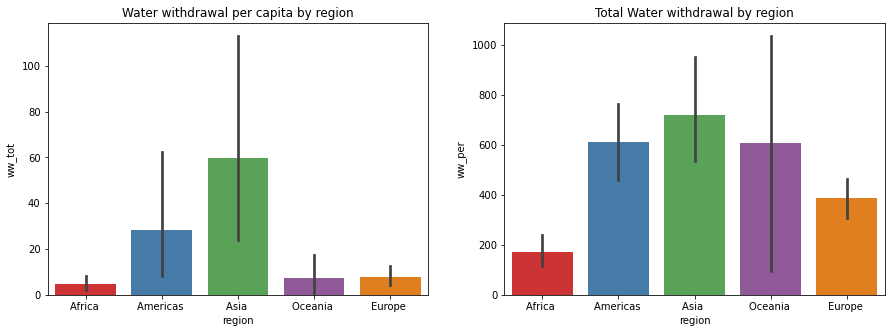

In [105]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Water withdrawal in total
sns.barplot(ax=axes[0],x='region',y='ww_tot',data=data, palette='Set1').set(title='Water withdrawal per capita by region')


# Water withdrawal per capita
sns.barplot(ax=axes[1], x='region',y='ww_per',data=data, palette='Set1').set(title='Total Water withdrawal by region')


**Correlation between Variables**

The heatmap depicts the correlation between all numerical columns.

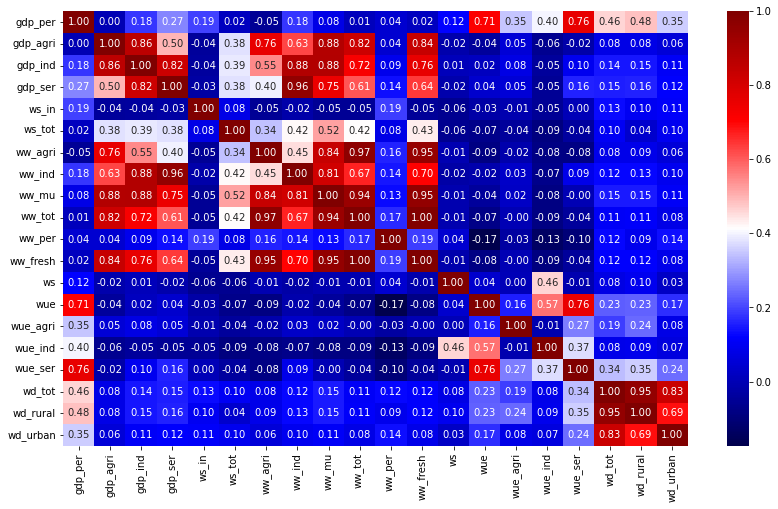

In [106]:
plt.figure(figsize=(14,8))
sns.heatmap(data=data.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='seismic')
plt.show()

## Modelling

The first label encodes the categorical features ‘region’

In [107]:
LE = LabelEncoder()
data['region_label'] = LE.fit_transform(data['region'])
data.head()

,population,ppl_den,gdp_per,gdp_agri,gdp_ind,gdp_ser,ws_in,ws_tot,ww_agri,ww_ind,...,wue,wue_agri,wue_ind,wue_ser,wd_tot,wd_rural,wd_urban,country,region,region_label
0,42228.408,17.730059,4136.289853,2.081500e+10,6.685176e+10,8.017580e+10,266.337296,11.667,6.6710,0.19100,...,14.463198,0.619380,350.377103,22.294463,83.6,81.8,84.3,Algeria,Africa,0
1,98423.598,98.281090,2513.199691,2.803456e+10,8.206749e+10,1.338240e+11,10.160165,57.500,61.3500,5.40000,...,4.584392,0.665586,22.136180,18.132214,99.4,99.0,100.0,Egypt,Africa,0
2,6678.559,3.795628,5312.471944,2.735459e+08,2.001877e+10,1.016851e+10,104.813029,0.700,4.8500,0.28000,...,4.287072,0.018498,58.982461,11.984035,71.2,68.3,72.1,Libya,Africa,0
3,36029.093,80.683222,3258.233846,1.446074e+10,2.759058e+10,6.194435e+10,804.905080,29.000,9.1560,0.21200,...,8.715869,0.432900,126.389217,56.591798,85.4,65.3,98.7,Morocco,Africa,0
4,11565.201,70.687617,3421.777360,3.905261e+09,9.038391e+09,2.443503e+10,362.726078,4.615,2.9326,0.04588,...,10.220137,0.272201,226.554750,32.440686,97.7,93.2,100.0,Tunisia,Africa,0


**Training and Testing the data**

In [108]:
data.columns

Index(['population', 'ppl_den', 'gdp_per', 'gdp_agri', 'gdp_ind', 'gdp_ser',
       'ws_in', 'ws_tot', 'ww_agri', 'ww_ind', 'ww_mu', 'ww_tot', 'ww_per',
       'ww_fresh', 'ws', 'wue', 'wue_agri', 'wue_ind', 'wue_ser', 'wd_tot',
       'wd_rural', 'wd_urban', 'country', 'region', 'region_label'],
      dtype='object')

In [109]:
# Training (70% of dataset) and Testing the data (30% of dataset)
train, test = train_test_split(data, test_size=0.3, random_state=1, shuffle=True)

training_features = ['population', 'ppl_den', 'gdp_per', 'gdp_agri',
       'gdp_ind', 'gdp_ser', 'ws_in', "ws_tot", 'ww_agri', 'ww_ind', 'ww_mu',
        'ww_tot',"ww_fresh",'ws', 'wue', 'wue_agri', 'wue_ind',
       'wue_ser', 'wd_tot', 'wd_rural', 'wd_urban', 'region_label']
target = 'ww_per'

train_X = train[training_features]
train_Y = train[target]

test_X = test[training_features]
test_Y = test[target]

First, let’s try the **linear regression model**

In [110]:
# linear regression model
model = LinearRegression()
model.fit(train_X, train_Y)

train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))

print('rmse_train:',rmse_train)
print('rmse_test:',rmse_test)

rmse_train: 247.4912083314052
rmse_test: 838.1516891732294


**Performance of Linear Regression model in prediction**

In [111]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_Y, test_pred_Y))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(test_Y, test_pred_Y, squared=False))
print('R^2:', metrics.r2_score(test_Y, test_pred_Y))

Mean Absolute Error (MAE): 391.9673971237701
Root Mean Squared Error (RMSE): 838.1516891732294
R^2: -0.29642882993526154


Also, as we know the target is not linear with many features, it is worth trying some **nonlinear models**. Like the **random forest model**.

In [112]:
# Random forest model.
model = RandomForestRegressor(n_estimators = 50,
                             max_depth = 6,
                             min_weight_fraction_leaf = 0.05,
                             max_features = 0.8,
                             random_state = 42)
model.fit(train_X, train_Y)

train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))


print('rmse_train:',rmse_train)
print('rmse_test:',rmse_test)

rmse_train: 167.38462547580278
rmse_test: 615.6766897949743


**Performance of Random Forest Regression model in prediction**

In [113]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_Y, test_pred_Y))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(test_Y, test_pred_Y, squared=False))
print('R^2:', metrics.r2_score(test_Y, test_pred_Y))

Mean Absolute Error (MAE): 283.0210080965905
Root Mean Squared Error (RMSE): 615.6766897949743
R^2: 0.3004659590231583


Performance in prediction of Random Forest Regression model are better than Linear Regression model.

**Data Visualization** 

To visualize the data, we made a scatter plot of prediction against actual Water withdrawal.

C:\Users\user\AppData\Local\Temp\ipykernel_7300\2614273386.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_test_Y = train_Y.append(test_Y)
C:\Users\user\AppData\Local\Temp\ipykernel_7300\2614273386.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_test_pred_Y = train_pred_Y.append(test_pred_Y)


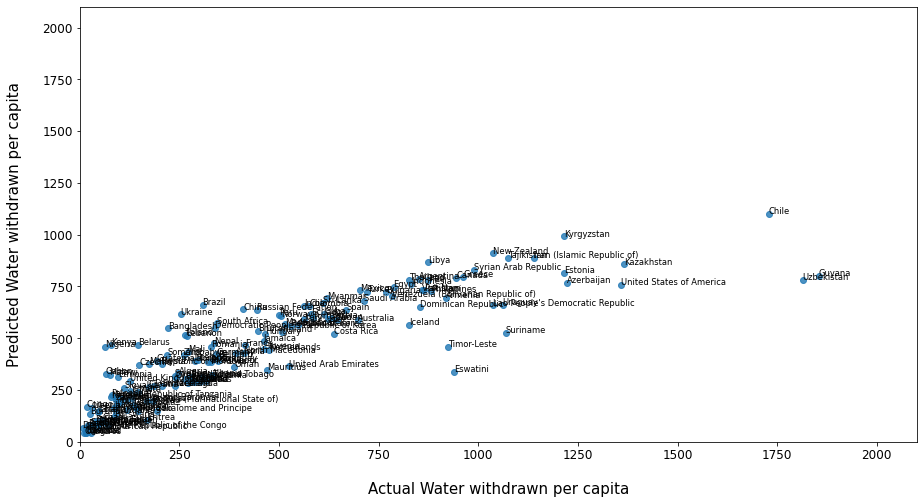

In [114]:
# Visualization of Results
plt.figure(figsize=(15,8))

train_test_Y = train_Y.append(test_Y)
train_test_pred_Y = train_pred_Y.append(test_pred_Y)

data_shuffled = data.loc[train_test_Y.index]
label = data_shuffled['country']

ax = sns.regplot(x= train_test_Y, y=train_test_pred_Y, fit_reg=False)

ax.set_xlabel('Actual Water withdrawn per capita',labelpad=20)
ax.set_ylabel('Predicted Water withdrawn per capita',labelpad=20)
ax.xaxis.label.set_fontsize(15)
ax.yaxis.label.set_fontsize(15)
ax.tick_params(labelsize=12)
plt.xlim(0,2100)
plt.ylim(0,2100)

# We only plot the countries have the population higher than 100 million 
# or have the water withdrawal per capita lower than 2100 m3/year per inhabitant
for i in range(0,train_test_Y.shape[0]):
     if((data_shuffled['population'].iloc[i]>1e8) |
        (data_shuffled['ww_per'].iloc[i]<2100)):
        plt.text(train_test_Y.iloc[i], train_test_pred_Y.iloc[i], label.iloc[i], size='small')

## Total Water Withdrawal Country

Top 10 countries with highest total Water Withdrawal, their Warer Withdrawal make up to about 65.9% of the global GDP.

<Figure size 1152x432 with 0 Axes>

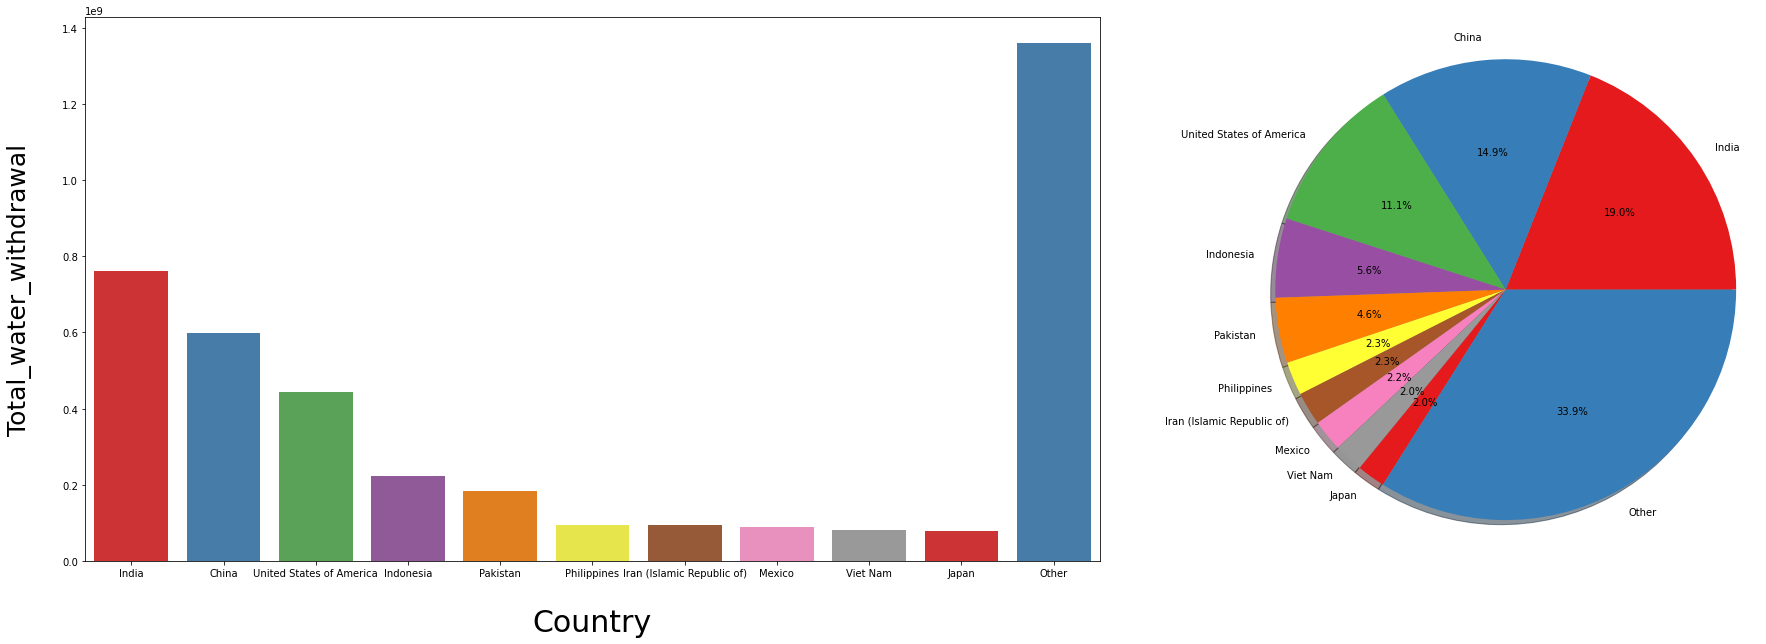

In [115]:
# Total Water Withdrawal 
data['Total_water_withdrawal'] = data['ww_per'] * data['population']
plt.figure(figsize=(16,6))

# Top 10 countries with highest Total Water Withdrawal, and other countries will group in Other 
top_water_use_countries = data.sort_values('Total_water_withdrawal',ascending=False).head(10)
other = pd.DataFrame({'country':['Other'], 
                      'Total_water_withdrawal':[data['Total_water_withdrawal'].sum() 
                                                - top_water_use_countries['Total_water_withdrawal'].sum()]})

water_use = pd.concat([top_water_use_countries[['country','Total_water_withdrawal']],other],ignore_index=True)

# Making plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30,10),gridspec_kw = {'width_ratios':[2,1]})
# Bar Plot for top 10 countries and group Other
sns.barplot(x='country',y='Total_water_withdrawal',data=water_use,ax=axes[0],palette='Set1')
axes[0].set_xlabel('Country',labelpad=30,fontsize=30)
axes[0].set_ylabel('Total_water_withdrawal',labelpad=30,fontsize=25)

# Pie chart for percent of total withdrawal in top 10 countries
colors = sns.color_palette("Set1", water_use.shape[0]).as_hex()
axes[1].pie(water_use['Total_water_withdrawal'], labels=water_use['country'],colors=colors,autopct='%1.1f%%',shadow=True)
axes[1].axis('equal')

# Save the figure
plt.savefig("Water_withdrawal_total_top10.png")
plt.show()

In 2018, India used 19% of total water in the world, following is China with 14.9%. Beside the top 10 countries, the rest of the world used 33.9% in total water.

Compared the above ten countries rank by total Water Withdrawal and Water Withdrawal per capita. We can see the countries with high total water withdrawal are quite different from those with high average Water Withdrawal. China and India jump above a lot when it comes to the total Water Withdrawal. The United States is only country in the top 10 for both total and average water withdrawal (7th in Water withdrawal per capita and 3rd in total water withdrawal). 


In [116]:
# Compared the above ten countries rank in total water withdrawal and water withdrawal per capita
Rank1 = data[['country','Total_water_withdrawal']].sort_values('Total_water_withdrawal', ascending=False).reset_index()
Rank2 = data[['country','ww_per']].sort_values('ww_per', ascending=False).reset_index()
Rank1 = pd.Series(Rank1.index.values+1, index=Rank1.country)
Rank2 = pd.Series(Rank2.index.values+1, index=Rank2.country)
Rank_change = (Rank2-Rank1).sort_values(ascending=False)
print('Water withdrawal total      Water withdrawal per capita:')
Rank_change.loc[top_water_use_countries.country]

Water withdrawal total      Water withdrawal per capita:


country
India                         50
China                         66
United States of America       3
Indonesia                     25
Pakistan                      20
Philippines                   16
Iran (Islamic Republic of)     3
Mexico                        29
Viet Nam                      17
Japan                         33
dtype: int64

Finally, we do a comparison of Water Demands in the top 10 countries with highest total Water withdrawal

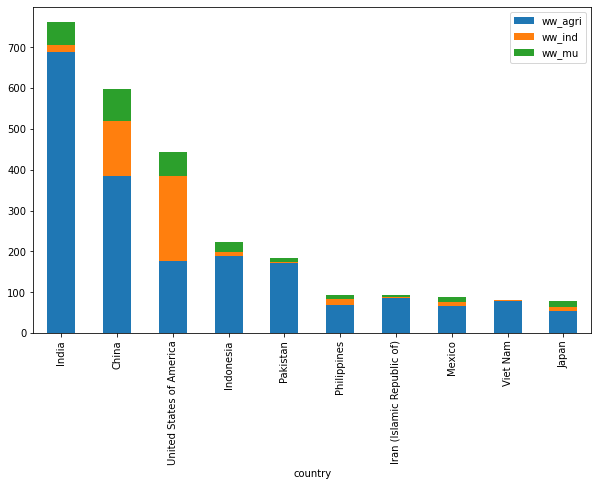

In [117]:
# Comparison of the water withdrawal structure for the Top 10 countries
plot_data = top_water_use_countries.head(10)[['country','ww_agri', 'ww_ind', 'ww_mu']]
plot_data = plot_data.set_index('country')
ax = plot_data.plot.bar(stacked=True,figsize=(10,6))
ax.legend(bbox_to_anchor=(1, 1))

plt.savefig('Water_withdrawal_demand.png',bbox_inches='tight')
plt.show()

And, considering the effect GDP structure to water withdrawal

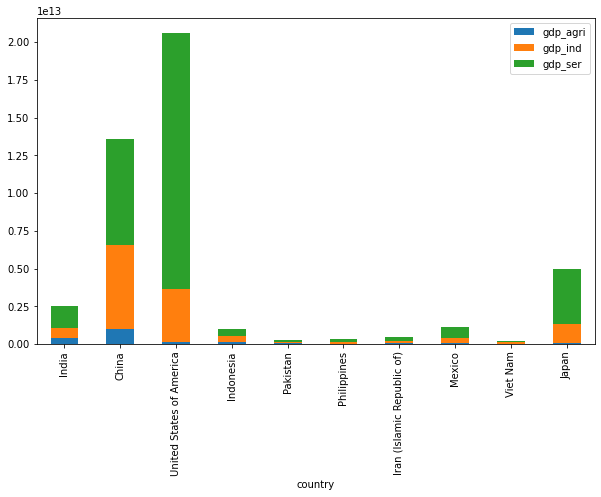

In [118]:
# Comparison of gdp per capital for top 10 countries with highest water withdrawn
plot_data = top_water_use_countries[['country','gdp_agri', 'gdp_ind', 'gdp_ser']]
plot_data = plot_data.set_index('country')
ax = plot_data.plot.bar(stacked=True,figsize=(10,6))
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

**Using data science in WATER WITHDRAWAL analysis enables us to know the factors that are affecting the Water Withdrawal per capita of various countries.**